In [21]:
import starepandas
import geopandas
import pystare
import matplotlib.pyplot as plt

In [24]:
fname = 'data/MOD05_L2.A2005349.2125.061.2017294065400.hdf'
modis = starepandas.read_mod09(fname, 
                               add_stare=True,
                               adapt_resolution=True,
                               track_first=False,
                               row_max=20, col_max=50)

In [25]:
trixels = modis.trixels()
geom = geopandas.points_from_xy(modis.lon, modis.lat)
modis.set_geometry(geom, inplace=True)
modis.set_trixels(trixels=trixels, inplace=True)

<AxesSubplot:>

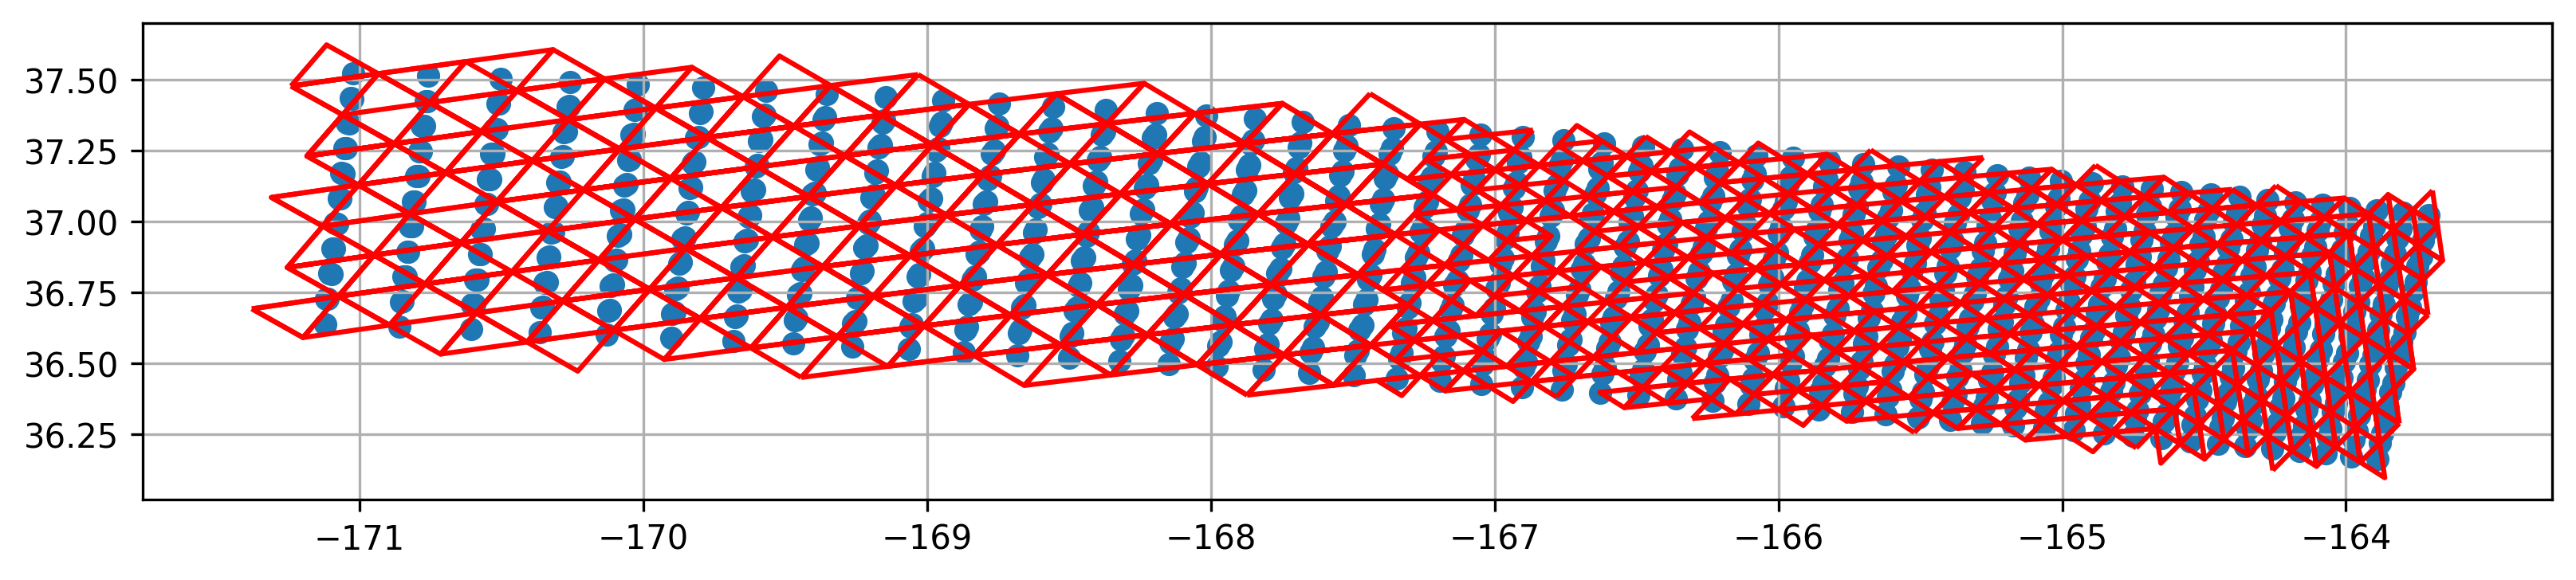

In [26]:
fig, ax = plt.subplots(figsize=(13,5), dpi=300)
ax.grid(True)

modis.plot(trixels=False, ax=ax)
modis.plot(trixels=True, color='r', ax=ax)

# Manually getting the 2D STARE array

In [27]:
import netCDF4
from pyhdf.SD import SD
import numpy
import pystare
import datetime

In [28]:
hdf = SD(fname)
lon = hdf.select('Longitude').get().astype(numpy.double)
lat = hdf.select('Latitude').get().astype(numpy.double)

In [29]:
start = datetime.datetime.now()
sids = pystare.from_latlon2D(lat=lat, lon=lon, adapt_resolution=True)
datetime.datetime.now()-start

datetime.timedelta(seconds=1, microseconds=985358)

In [30]:
print(pystare.spatial_resolution(sids).min())
print(pystare.spatial_resolution(sids).max())

9
11


# Intersecting MODIS Data

In [31]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.sort_values(by='name', inplace=True)
africa = world[world.continent=='Africa']
stare = starepandas.stare_from_gdf(africa, level=7, force_ccw=True)
africa = starepandas.STAREDataFrame(africa, stare=stare)
trixels = africa.trixels()
africa.set_trixels(trixels, inplace=True)

<AxesSubplot:>

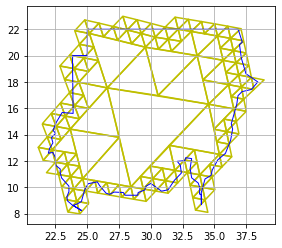

In [32]:
fig, ax = plt.subplots()
ax.grid(True)

angola = africa[africa.name=='Sudan']
angola.plot(ax=ax, trixels=True, boundary=True, color='y', zorder=0)
angola.plot(ax=ax, trixels=False, facecolor="none", edgecolor='blue', zorder=1)